# Kinetic Mixing Constraints

This notebook contains the constraints on the kinetic mixing model in `Hazma` from future telescopes.

## Computing the constraints

In [3]:
from constraints import Constraints
import numpy as np
import pickle

In [4]:
n = 150
mxs = np.geomspace(1, 250, n)
mvs = 3 * mxs
c = Constraints(mxs[0], mvs[0], 1.0, 1e-3)

In [5]:
constraints = c.compute_telescope_constraints(mxs, mvs)

pangu      : 100%|██████████| 150/150 [00:14<00:00, 10.25it/s]


In [ ]:
constraints.update(c.compute_pheno_constraints(mxs, mvs))
constraints['relic_density'] = c.compute_relic_density_contours(mxs, mvs)
constraints['cmb'] = c.compute_cmb_constraints(mxs, mvs)

In [13]:
constraints['mx'] = mxs
constraints['mv'] = mvs
# Save it
with open('data/constraints.p', 'wb') as f:
    pickle.dump(constraints, f)

## Plots

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load constraints
with open('data/constraints.p', 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

# Condense the pheno constraints
df['other'] = np.min([df['babar'],df['lsnd'],df['e137']], axis=0)
# Condense the old telescopes
df['past_telescopes'] = np.min([df['comptel'],df['egret'],df['fermi'],df['integral']], axis=0)
df_condensed = df.drop(['babar','lsnd','e137','comptel','fermi','egret','integral'],axis=1)

In [3]:
df_condensed

,adept,amego,e-astrogam,gecco,grams,mast,pangu,relic_density,cmb,mx,mv,other,past_telescopes
0,2.688779e-20,2.667636e-30,6.906323e-30,5.701580e-30,2.322304e-29,inf,inf,2.125981e-26,1.937001e-30,1.000000,3.000000,2.693629e-28,1.018024e-27
1,1.470354e-20,2.669244e-30,6.866801e-30,5.538284e-30,2.260092e-29,inf,inf,2.128014e-26,1.981019e-30,1.037752,3.113256,2.527480e-28,1.028979e-27
2,7.945216e-21,2.681394e-30,6.857977e-30,5.389428e-30,2.192212e-29,inf,inf,2.128884e-26,1.996726e-30,1.076929,3.230787,2.397666e-28,1.044292e-27
3,4.300915e-21,2.703105e-30,6.876405e-30,5.296979e-30,2.137449e-29,inf,inf,2.128623e-26,1.960731e-30,1.117585,3.352756,2.274091e-28,1.063640e-27
4,2.310217e-21,2.733674e-30,6.919296e-30,5.246020e-30,2.101113e-29,inf,inf,2.127295e-26,1.927274e-30,1.159776,3.479329,2.157866e-28,1.086801e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.791250e-27,1.647181e-27,1.700907e-27,7.364294e-27,1.617880e-27,1.649170e-28,2.739349e-27,1.975149e-26,1.486602e-28,215.558811,646.676434,2.535928e-28,3.095380e-26
146,2.919315e-27,1.721313e-27,1.776205e-27,7.876659e-27,1.706018e-27,1.733218e-28,2.869931e-27,1.980008e-26,1.566184e-28,223.696576,671.089729,2.375607e-28,3.291510e-26
147,3.047593e-27,1.801812e-27,1.853630e-27,8.424538e-27,1.799551e-27,1.815658e-28,3.007121e-27,1.984603e-26,1.645245e-28,232.141558,696.424673,2.224606e-28,3.500315e-26
148,3.182972e-27,1.883589e-27,1.936138e-27,9.010457e-27,1.898862e-27,1.900339e-28,3.153378e-27,1.988914e-26,1.728745e-28,240.905354,722.716061,2.082536e-28,3.722690e-26


In [4]:
fig_dim = 4
mpl_colors = 2 * [c["color"] for c in plt.rcParams["axes.prop_cycle"]]
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

In [5]:
df_condensed.columns

Index(['adept', 'amego', 'e-astrogam', 'gecco', 'grams', 'mast', 'pangu',
       'relic_density', 'cmb', 'mx', 'mv', 'other', 'past_telescopes'],
      dtype='object')

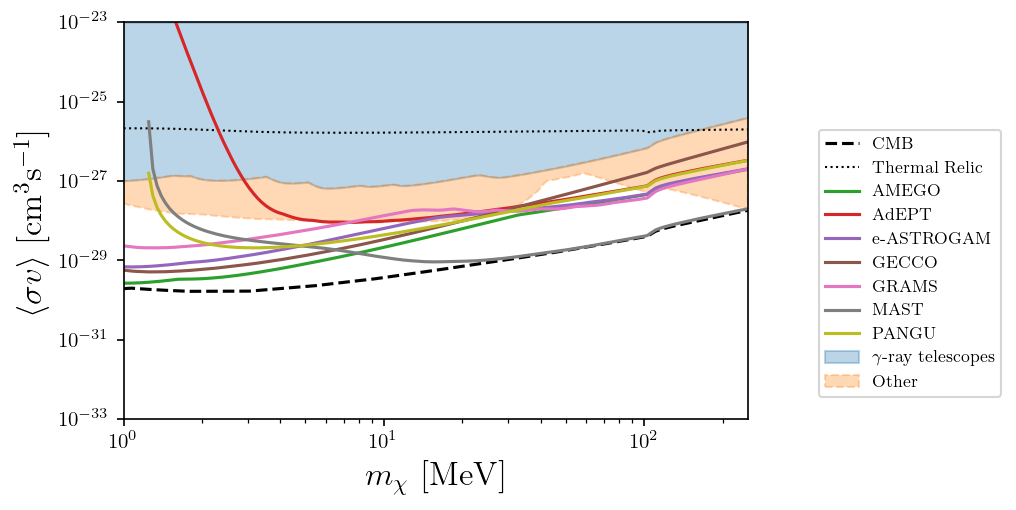

In [9]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.dpi = 150

plt.figure(dpi=150, figsize=(7, 3.5))

ymin, ymax = [1e-33, 1e-23]

plt.plot(
    df_condensed['mx'], 
    df_condensed['cmb'], 
    label=r'CMB',
    linestyle="--",
    color="black",
)

plt.plot(
    df_condensed['mx'], 
    df_condensed['relic_density'], 
    label=r'Thermal Relic',
    linestyle=":",
    color="black",
    linewidth=1,
)



plt.fill_between(
    df_condensed['mx'], 
    df_condensed['past_telescopes'], 
    ymax, 
    label=r'$\gamma$-ray telescopes',
    linestyle="-",
    color=colors[0],
    alpha=0.3
)

plt.fill_between(
    df_condensed['mx'], 
    df_condensed['other'], 
    df_condensed['past_telescopes'], 
    label=r'Other',
    linestyle="--",
    color=colors[1],
    alpha=0.3
)


plt.plot(
    df_condensed['mx'],     
    df_condensed['amego'],  
    label='AMEGO',
    linestyle="-",
    color=colors[2],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['adept'],  
    label='AdEPT',
    linestyle="-",
    color=colors[3],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['e-astrogam'],  
    label='e-ASTROGAM',
    linestyle="-",
    color=colors[4],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['gecco'],  
    label='GECCO',
    linestyle="-",
    color=colors[5],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['grams'],  
    label='GRAMS',
    linestyle="-",
    color=colors[6],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['mast'],  
    label='MAST',
    linestyle="-",
    color=colors[7],
)
plt.plot(
    df_condensed['mx'],     
    df_condensed['pangu'],  
    label='PANGU',
    linestyle="-",
    color=colors[8],
)



plt.yscale('log')
plt.xscale('log')
    
plt.ylim([ymin, ymax])
plt.xlim([np.min(df_condensed['mx']), np.max(df_condensed['mx'])])
plt.ylabel(r'$\langle\sigma v\rangle \ [\mathrm{cm}^3\mathrm{s}^{-1}]$',fontsize=16)
plt.xlabel(r'$m_{\chi} \ [\mathrm{MeV}]$',fontsize=16)

plt.legend(loc=0, bbox_to_anchor=(1.1,0.75), fontsize=8)
plt.tight_layout()
plt.savefig('figures/kinetic_mixing.pdf')